## Check Corroding

## Visualize the Results

In [81]:
import numpy as np

crop_size = (200, 200, 100)

base_dir    = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models"
model_tag   = "cropped"
model_name  = "straight_model"
y_tag       = "one_landmark_res"
model_size  = f"{crop_size[0]}x{crop_size[1]}x{crop_size[2]}"

file_dir = f"{base_dir}/{model_tag}_dataset/{model_name}/one_landmark/corroding_test"
file_res_dir = f"{base_dir}/{model_tag}_dataset/{model_name}/{y_tag}/{model_size}/corroding_test"

file = "err_corrode3x25.npy"
file_15x15x15 = "err_corrode15x15x15.npy"
file_50x6 = "err_corrode50x6.npy"
file_100x4and50x2 = "err_corrode100x4and50x2.npy"

file_path = f"{file_dir}/{file}"
file_15x15x15_path = f"{file_dir}/{file_15x15x15}"
file_50x6_path = f"{file_dir}/{file_50x6}"
file_100x4and50x2_path = f"{file_res_dir}/{file_100x4and50x2}"

err_array = np.load(file_path)
err_array_15x15x15 = np.load(file_15x15x15_path)
err_array_50x6 = np.load(file_50x6_path)
err_array_100x4and50x2 = np.load(file_100x4and50x2_path)

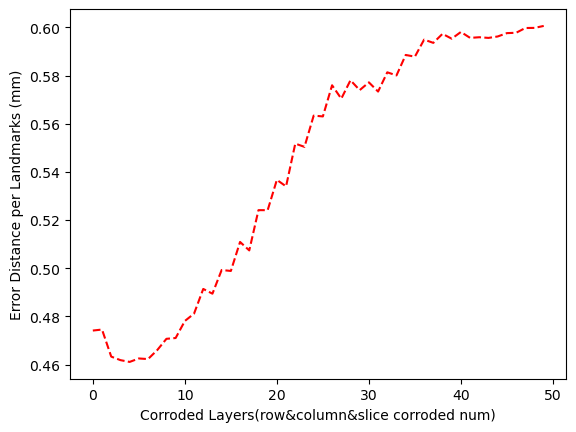

In [26]:
import matplotlib.pyplot as plt

err_dis = np.power(err_array, 0.5)
corroded_layers = np.arange(0, 50)

plt.plot(corroded_layers, err_dis, 'r--')

plt.xlabel('Corroded Layers(row&column&slice corroded num)')
plt.ylabel('Error Distance per Landmarks (mm)')
plt.show()

In [32]:
# find the indexes of the minimum value (the best precision)
min_value = np.min(err_array_15x15x15)
min_value_idx = np.argwhere(err_array_15x15x15==min_value)

print("min value: ", min_value)
print("index    : ", min_value_idx)

min value:  0.19410739839076996
index    :  [[ 3  1 14]]


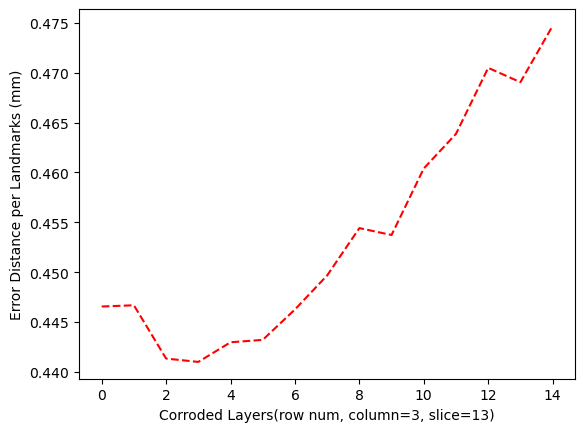

In [30]:
import matplotlib.pyplot as plt

err_dis = np.power(err_array_15x15x15, 0.5)
corroded_layers = np.arange(0, 15)

corroded_column_num = 3
corroded_slice_num = 13

plt.plot(corroded_layers, err_dis[:, corroded_column_num, corroded_slice_num], 'r--')

plt.xlabel(f'Corroded Layers(row num, column={corroded_column_num}, slice={corroded_slice_num})')
plt.ylabel('Error Distance per Landmarks (mm)')
plt.show()

In [71]:
# s = 0 # slice

def f(r, c, s=0):
    return err_array_15x15x15[r, c, s]

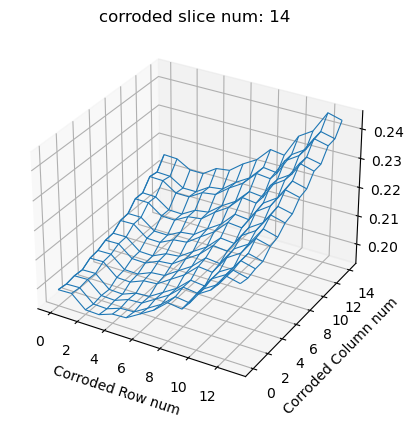

In [76]:
slice_num = 14

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E = f(R, C, s=slice_num)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(R, C, E, linewidths=0.8)
ax.set_title(f"corroded slice num: {slice_num}")
plt.xlabel("Corroded Row num")
plt.ylabel("Corroded Column num")
plt.show()

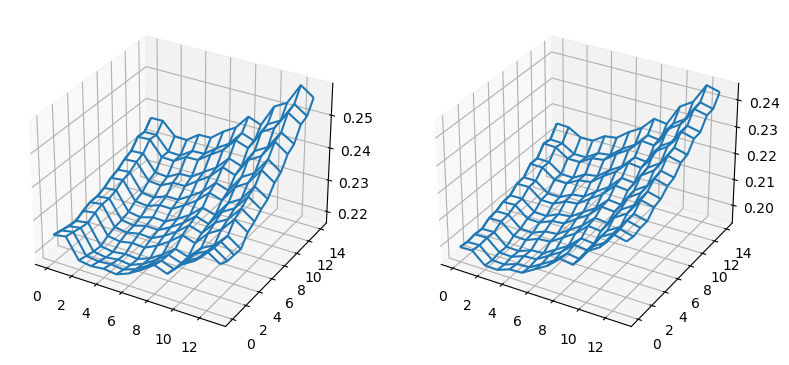

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E1 = f(R, C, s=0)
E2 = f(R, C, s=14)

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

ax.plot_wireframe(R, C, E1)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(R, C, E2)

plt.show()

## Corrode 6 surfaces separately

In [128]:
print(err_array_50x6[0])

[0.08260079 0.08386103 0.08440591 0.08444443 0.08428264 0.08381566
 0.08480746 0.08508033 0.08625939 0.08563523 0.08699956 0.08804172
 0.08988406 0.08872105 0.08928096 0.08882427 0.08995058 0.08788023
 0.0870527  0.08588096 0.08869677 0.08922141 0.0943753  0.09553443
 0.10433864 0.11135772 0.12189006 0.121457   0.12530912 0.12355978
 0.12832084 0.128893   0.13662696 0.14104861 0.15274628 0.15607296
 0.16564764 0.17104466 0.18275993 0.1864067  0.19458282 0.2002078
 0.21047883 0.21938999 0.23359938 0.25259665 0.26778567 0.28068045
 0.28007022 0.27144954]


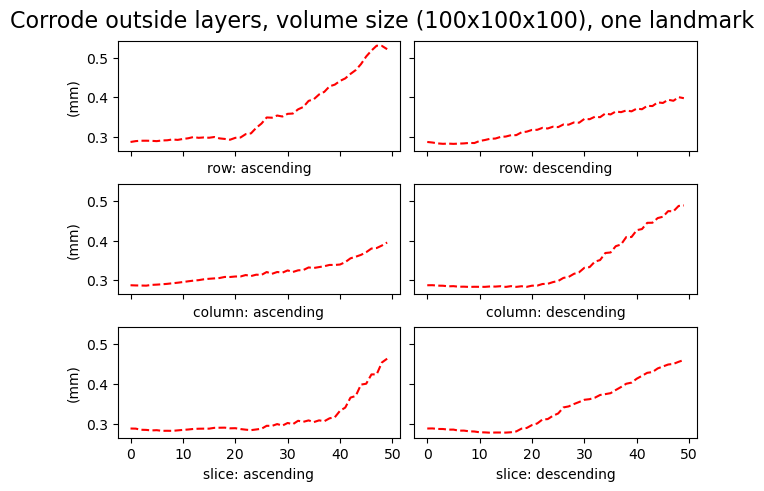

In [105]:

from matplotlib import pyplot

fig, axs = pyplot.subplots(3, 2, sharex=True, sharey=True, constrained_layout=True)

err_dis = np.power(err_array_50x6, 0.5)
corroded_layers = np.arange(0, 50)

# based on the Volume array
# Cut from start to Row ascending order
axs[0][0].plot(corroded_layers, err_dis[0], 'r--')
axs[0][0].set_xlabel("row: ascending")
# Cut from end to Row descending order
axs[0][1].plot(corroded_layers, err_dis[1], 'r--')
axs[0][1].set_xlabel("row: descending")
fig.suptitle("Corrode outside layers, volume size (100x100x100), one landmark", fontsize=16)
# Cut from start to Column ascending order
axs[1][0].plot(corroded_layers, err_dis[2], 'r--')
axs[1][0].set_xlabel("column: ascending")
# Cut from end to Column descending order
axs[1][1].plot(corroded_layers, err_dis[3], 'r--')
axs[1][1].set_xlabel("column: descending")
# Cut from start to Slice ascending order
axs[2][0].plot(corroded_layers, err_dis[4], 'r--')
axs[2][0].set_xlabel("slice: ascending")
# Cut from end to Slice descending order
axs[2][1].plot(corroded_layers, err_dis[5], 'r--')
axs[2][1].set_xlabel("slice: descending")

# pyplot.setp(axs[-1, :], xlabel='corrode num')
pyplot.setp(axs[:, 0], ylabel='(mm)')

pyplot.show()


In [130]:
print(err_array_100x4and50x2[0, 0:101])

[0.01402328 0.01406312 0.01411638 0.01411789 0.01405858 0.01400602
 0.01390944 0.01382208 0.01375868 0.0136471  0.0136181  0.01344495
 0.01328979 0.01323664 0.01313122 0.01308851 0.01269759 0.01281069
 0.0124174  0.0128353  0.01276943 0.01290863 0.01277379 0.01278857
 0.0123405  0.01240257 0.01180621 0.0121869  0.01191163 0.01231053
 0.01213807 0.01292572 0.01363392 0.01434243 0.01491001 0.01478971
 0.01492488 0.01451852 0.01461208 0.01458442 0.0158481  0.01624267
 0.01783862 0.01671279 0.01753089 0.01680739 0.01829528 0.0172533
 0.01954792 0.01914566 0.0218677  0.02016278 0.02218023 0.02184668
 0.02439093 0.02406535 0.02871256 0.02885113 0.03259796 0.03108587
 0.03450719 0.03575108 0.03835864 0.03981804 0.04507414 0.04794843
 0.051915   0.05209342 0.05487165 0.05647703 0.06265189 0.06811795
 0.08069579 0.08409123 0.10775868 0.1086706  0.12300017 0.12042144
 0.14044964 0.14191429 0.15074834 0.15246698 0.15654281 0.1538859
 0.1559242  0.1527857  0.15202639 0.15437317 0.16369151 0.171384

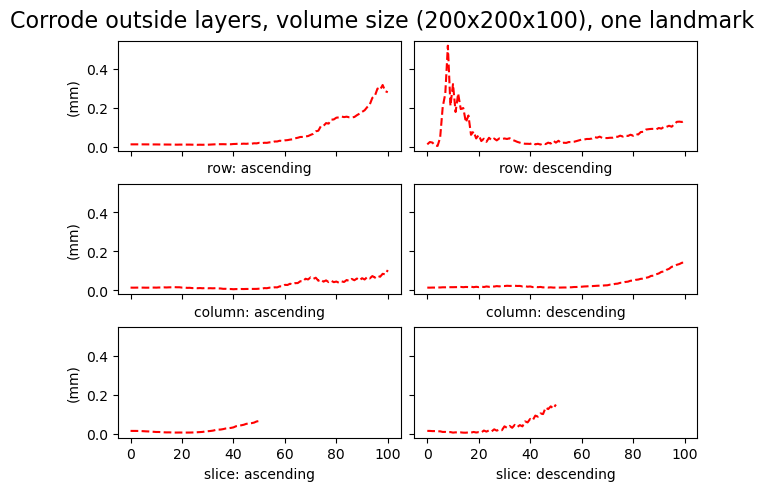

In [117]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(3, 2, sharex=True, sharey=True, constrained_layout=True)

# err_dis = np.power(err_array_100x4and50x2, 0.5)
# err_dis = np.where(err_array_100x4and50x2>0, err_array_100x4and50x2**(1/2), err_array_100x4and50x2)
err_dis = (err_array_100x4and50x2 ** 2) ** (1/2)
corroded_layers_100 = np.arange(0, 101)
corroded_layers_50 = np.arange(0, 51)

# based on the Volume array
# Cut from start to Row ascending order
axs[0][0].plot(corroded_layers_100, err_dis[0], 'r--')
axs[0][0].set_xlabel("row: ascending")
# Cut from end to Row descending order
axs[0][1].plot(corroded_layers_100, err_dis[1], 'r--')
axs[0][1].set_xlabel("row: descending")
fig.suptitle("Corrode outside layers, volume size (200x200x100), one landmark", fontsize=16)
# Cut from start to Column ascending order
axs[1][0].plot(corroded_layers_100, err_dis[2], 'r--')
axs[1][0].set_xlabel("column: ascending")
# Cut from end to Column descending order
axs[1][1].plot(corroded_layers_100, err_dis[3], 'r--')
axs[1][1].set_xlabel("column: descending")
# Cut from start to Slice ascending order
axs[2][0].plot(corroded_layers_50, err_dis[4, 0:51], 'r--')
axs[2][0].set_xlabel("slice: ascending")
# Cut from end to Slice descending order
axs[2][1].plot(corroded_layers_50, err_dis[5, 0:51], 'r--')
axs[2][1].set_xlabel("slice: descending")

# pyplot.setp(axs[-1, :], xlabel='corrode num')
pyplot.setp(axs[:, 0], ylabel='(mm)')

pyplot.show()

## Meaning of the values in Volumes

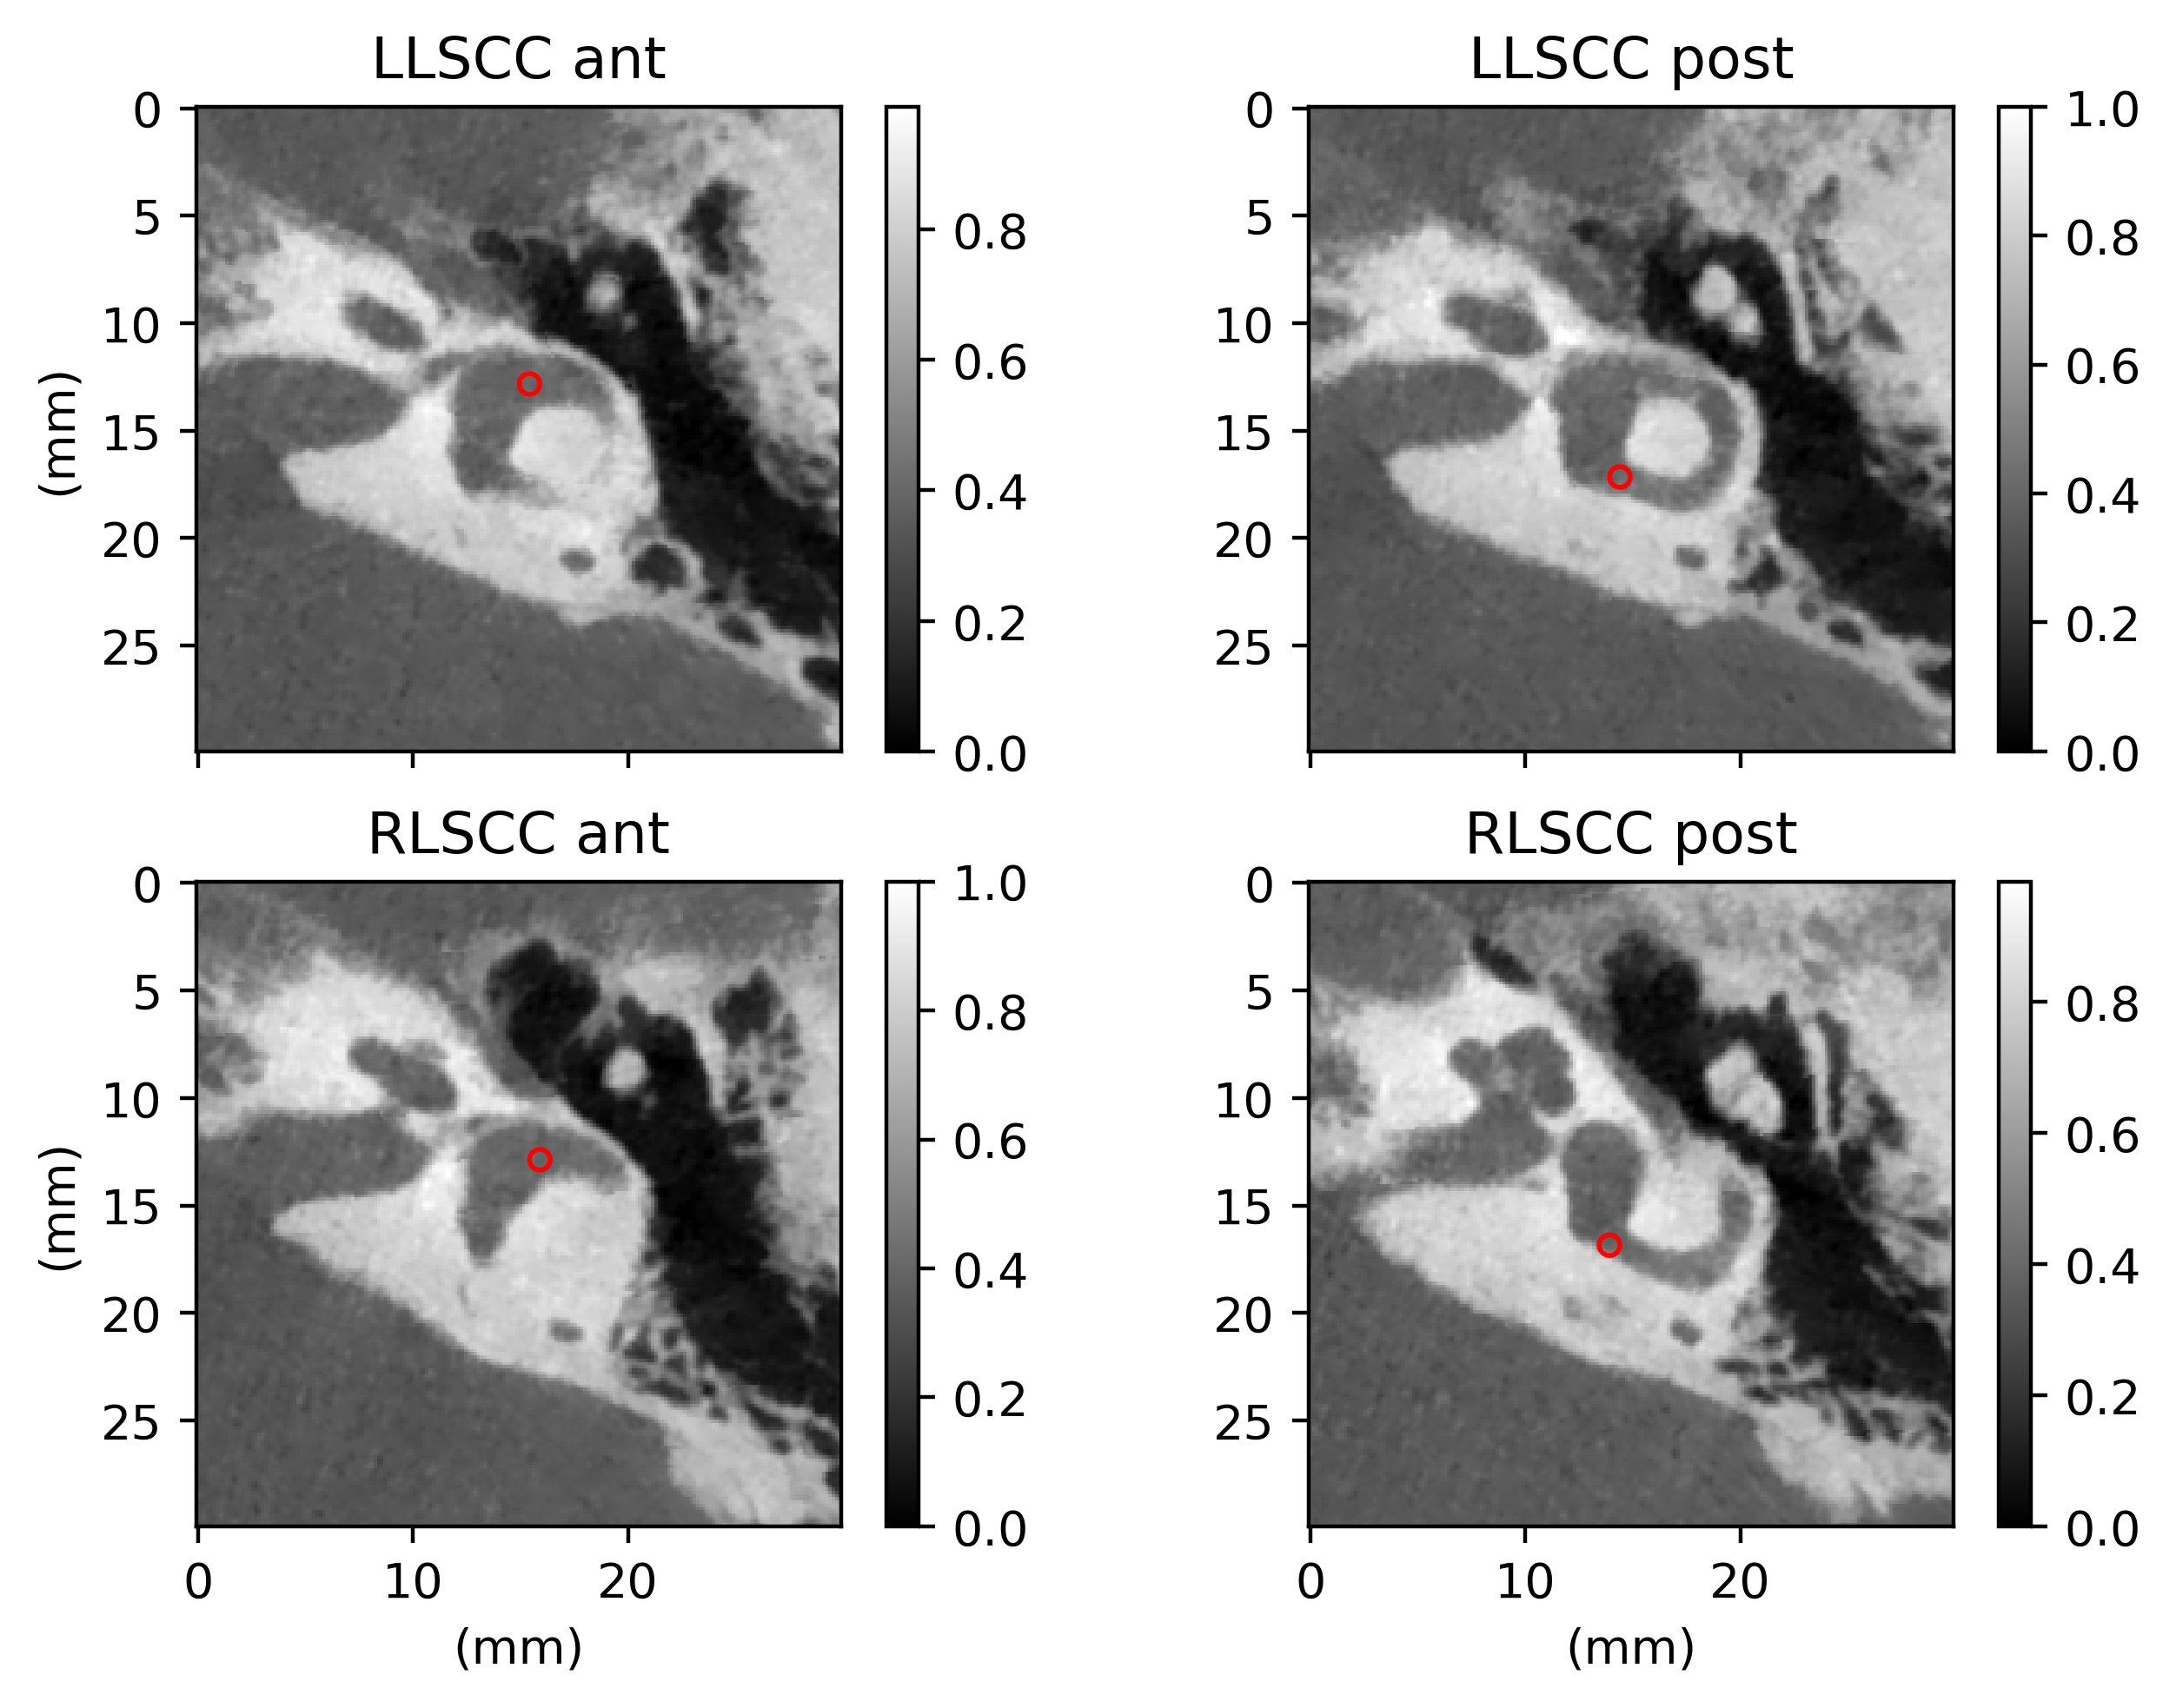

In [120]:
import Functions.Visualization as Visualization

import importlib

importlib.reload(Visualization)

data_base_dir = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z5050"
pat_name = "AH"
aug_id = 10

left_volume_path = f"{data_base_dir}/volumes/{pat_name}_augVolume_{aug_id}_cropped_left.npy"
right_volume_path = f"{data_base_dir}/volumes/{pat_name}_augVolume_{aug_id}_cropped_right.npy"
left_landmarks_path = f"{data_base_dir}/points/{pat_name}_augPoints_{aug_id}_cropped_left.npy"
right_landmarks_path = f"{data_base_dir}/points/{pat_name}_augPoints_{aug_id}_cropped_right.npy"
left_length_path = f"{data_base_dir}/length/{pat_name}_augLength_{aug_id}_cropped_left.npy"
right_length_path = f"{data_base_dir}/length/{pat_name}_augLength_{aug_id}_cropped_right.npy"

left_volume = np.load(left_volume_path)
right_volume = np.load(right_volume_path)
left_landmarks = np.load(left_landmarks_path)
right_landmarks = np.load(right_landmarks_path)

pixel_space = [0.15, 0.15, 0.15]

Visualization.show_two_landmarks(left_volume, left_landmarks, right_volume, right_landmarks, pixel_space)



## Meaning of the values in trained models' filters